# Analysis of Cancer Genomic Data by using Unsupervised Learning Algorithms

In [ ]:
import pandas as pd
from matplotlib.pyplot import *
from matplotlib import colors
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics.cluster import adjusted_rand_score

In [3]:
data_ = pd.read_csv('data.csv')
labels_ = pd.read_csv('labels.csv')

In [4]:
data_.drop(columns='Unnamed: 0', axis=1, inplace=True)
labels_.drop(columns='Unnamed: 0', axis=1, inplace=True)

data_ = pd.concat([data_, labels_], ignore_index=False, axis=1)
del labels_

In [5]:
df_label_counts = data_.Class.value_counts().reset_index().rename(columns={'index': 'Class', 'Class': 'sample_counts'})
df_label_counts

,Class,sample_counts
0,BRCA,300
1,KIRC,146
2,LUAD,141
3,PRAD,136
4,COAD,78


Text(0,0.5,'Sample Counts')

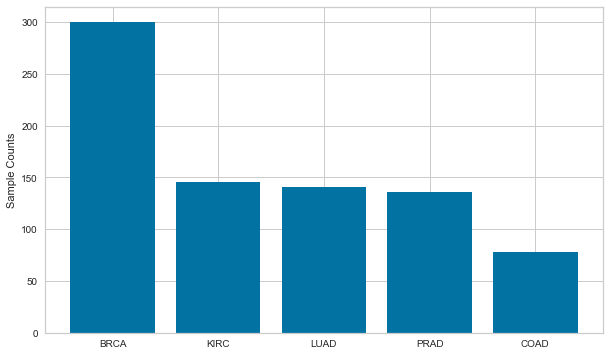

In [5]:
# Classwise distribution of sample size
figure(figsize=(10, 6))
bar(df_label_counts.Class, df_label_counts.sample_counts)
ylabel('Sample Counts')

<BarContainer object of 200 artists>

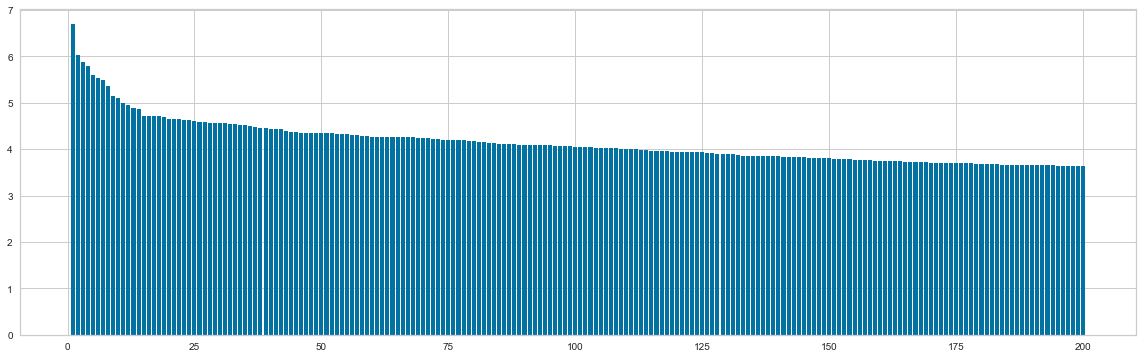

In [6]:
# Plot of Std Dev for top 10% Genes
df_std = data_.iloc[:, 0:-1].std().reset_index().rename(columns={'index': 'Gene', 0: 'std_dev'})
df_std.sort_values(by='std_dev', ascending=False, inplace=True)
df_std = df_std.head(200)
df_std.index = range(len(df_std))

figure(figsize=(20, 6))
bar(list(range(1, 201)), df_std.std_dev)

In [7]:
top_var_genes = list(df_std.Gene)

In [8]:
df_top_genes = data_[top_var_genes+['Class']]

In [9]:
df_top_genes.head()

,gene_9176,gene_9175,gene_15898,gene_15301,gene_15589,gene_3540,gene_19661,gene_3541,gene_11250,gene_15897,...,gene_12977,gene_6072,gene_6816,gene_5199,gene_5727,gene_11348,gene_4464,gene_2954,gene_4345,Class
0,18.525161,17.173570,1.334282,13.618145,0.00000,4.997134,1.094912,5.788312,18.015981,9.595069,...,4.267356,8.671502,4.479011,9.059382,8.000563,2.338339,10.690260,3.877077,14.509033,PRAD
1,0.000000,0.000000,13.609213,0.000000,0.00000,6.736605,11.169775,13.059513,1.004394,14.001091,...,0.000000,2.707856,2.094168,1.706508,5.158272,8.924634,0.000000,6.163469,5.275331,LUAD
2,16.053597,14.818422,1.074163,12.759976,0.00000,7.009739,0.000000,5.155361,7.799819,8.172052,...,0.796598,5.324101,4.306933,9.716878,1.074163,0.000000,5.297316,0.452595,1.306846,PRAD
3,18.371794,17.371079,0.434882,12.353276,0.00000,5.445151,1.031960,5.983377,11.913121,11.765829,...,2.566840,7.136079,1.637239,4.933119,6.818505,2.058697,12.095582,2.650029,5.310954,PRAD
4,0.000000,1.580097,1.095654,0.000000,14.97592,8.077916,12.783131,8.349648,1.095654,4.603502,...,5.235390,2.316088,3.208502,0.000000,14.270376,4.424089,7.341479,6.722630,9.082072,BRCA


In [10]:
df_gene_average = df_top_genes.groupby(by='Class').agg(dict(zip(top_var_genes, len(top_var_genes)*['mean']))).reset_index()
df_gene_average


,Class,gene_9176,gene_9175,gene_15898,gene_15301,gene_15589,gene_3540,gene_19661,gene_3541,gene_11250,...,gene_6876,gene_12977,gene_6072,gene_6816,gene_5199,gene_5727,gene_11348,gene_4464,gene_2954,gene_4345
0,BRCA,1.259048,1.616576,1.067688,0.412445,9.861198,6.739489,12.235694,9.000999,4.382483,...,12.769879,3.556987,2.559067,2.028045,1.106164,11.761891,5.353839,2.164143,6.825419,6.550939
1,COAD,2.781059,1.054822,1.382390,6.596079,0.047390,16.251452,5.883456,14.480650,0.554094,...,4.530450,1.094600,11.545350,6.358639,0.353898,2.772828,1.725343,3.280564,8.331549,8.276854
2,KIRC,0.409529,0.363720,1.078570,8.207115,0.565352,0.609368,6.227471,0.825130,0.320580,...,6.343440,10.058907,2.467582,11.343921,9.687691,6.810147,1.728418,2.073414,0.906361,1.276327
3,LUAD,0.188861,0.867502,15.700952,5.959785,0.110857,12.131822,7.216909,14.267683,5.914015,...,6.162650,0.286295,4.383966,5.853313,2.009928,6.832939,7.672512,1.535221,8.749368,6.764573
4,PRAD,18.237407,16.752995,0.742695,12.748019,0.167837,4.415432,1.319845,5.349038,13.641454,...,6.882413,2.426333,8.074464,3.739106,4.229220,7.673050,2.738058,9.744544,2.943233,6.145913


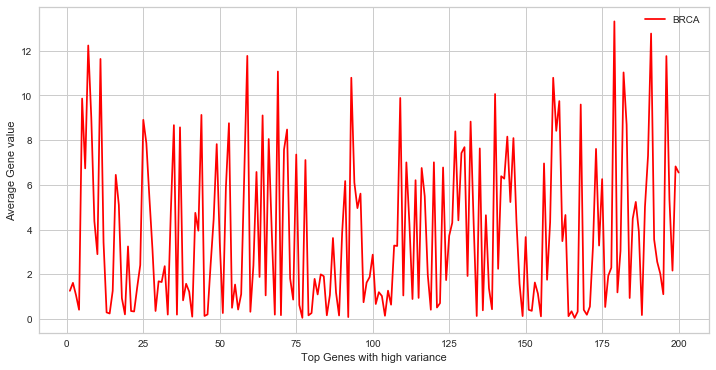

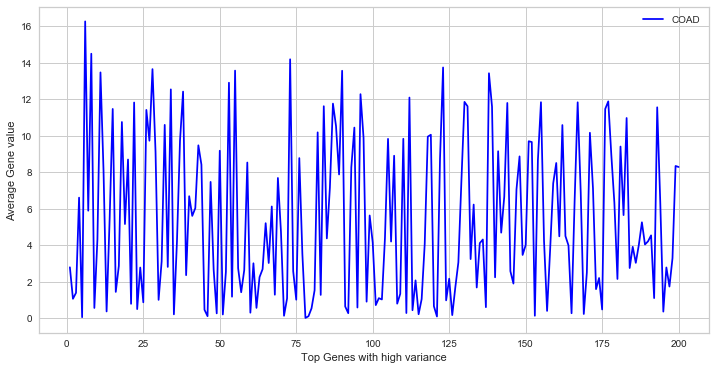

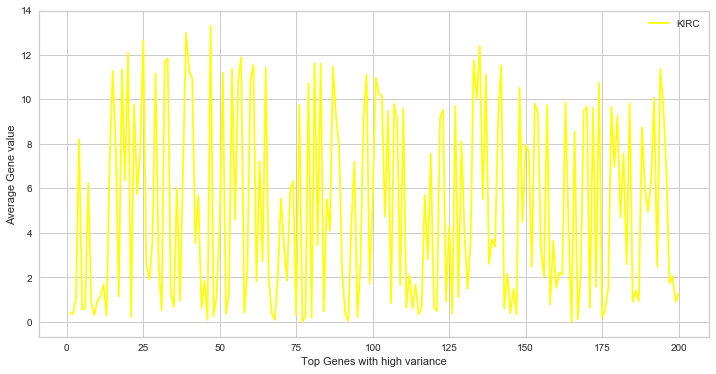

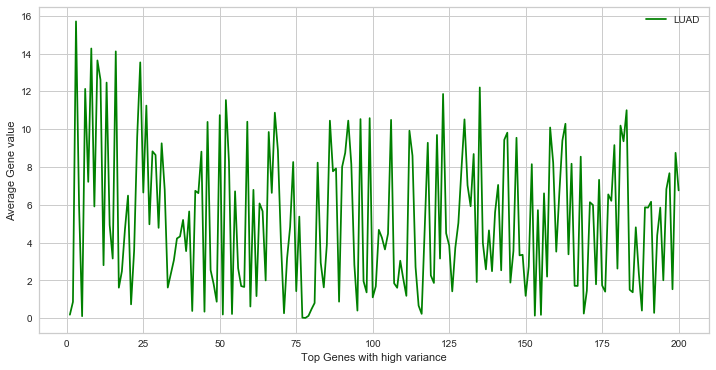

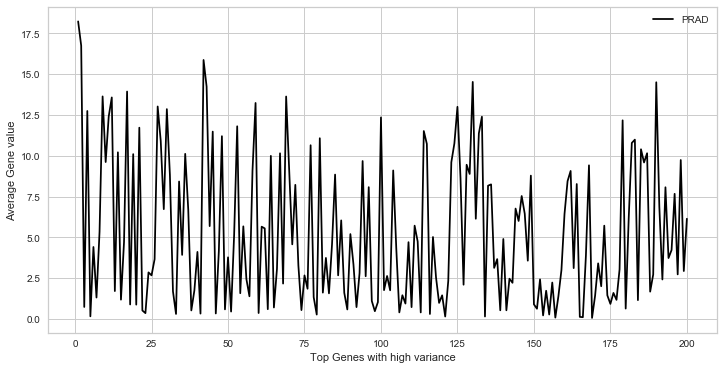

In [11]:
# Average value for Top Genes acorss different Tumor labels

mean_list = df_gene_average.to_dict(orient='split')['data']
color_map = {'BRCA': 'red', 'COAD': 'blue', 'KIRC': 'yellow', 'LUAD': 'green', 'PRAD': 'black'}

for row_ in mean_list:
    figure(figsize=(12, 6))
    plot(list(range(1, 201)), row_[1:], label=row_[0], color=color_map[row_[0]])
    xlabel('Top Genes with high variance')
    ylabel('Average Gene value')
    legend()

In [6]:
# Dimension Reduction by using PCA

pca_ = PCA(n_components=500)
pca_.fit(np.array(data_.iloc[:, :-1]))
print('Total Variance Captured : {}'.format(sum(pca_.explained_variance_ratio_)))
df_pcs = pd.DataFrame(pca_.fit_transform(np.array(data_.iloc[:, :-1])), columns=['pc_{}'.format(_) for _ in range(1, 501)])

Total Variance Captired : 0.9538551338215069


Text(0,0.5,'Variance Captured')

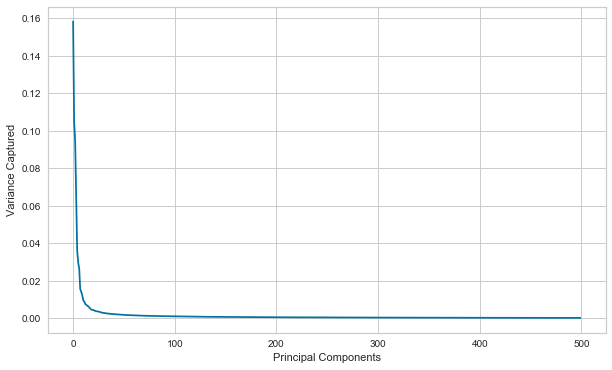

In [13]:
figure(figsize=(10, 6))
plot(pca_.explained_variance_ratio_)
xlabel('Principal Components')
ylabel('Variance Captured')

In [7]:
df_clust = pd.concat([df_pcs, data_.Class], ignore_index=False, axis=1)

In [6]:
df_clust.head()

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,...,pc_492,pc_493,pc_494,pc_495,pc_496,pc_497,pc_498,pc_499,pc_500,Class
0,-62.755415,-94.071973,89.519831,-15.942567,81.423539,-13.998292,7.716073,-22.936551,-32.837892,-2.202680,...,-0.170611,5.542210,-4.258939,-1.686970,4.361455,-3.115693,-4.365067,-4.199322,-1.686036,PRAD
1,-2.432896,90.585842,-1.067308,-53.083120,-15.676684,60.842472,10.257369,-48.822959,14.257400,-12.214352,...,2.414491,-0.344932,-1.115752,5.111089,-3.961978,-1.672984,2.512118,1.253570,0.237560,LUAD
2,-71.266853,-8.064608,66.112455,81.381475,-7.525685,109.824273,5.519407,-13.364480,38.415728,-5.124731,...,-0.152252,1.600242,0.130269,2.571763,-0.180671,-0.818346,2.746928,0.399614,0.769938,PRAD
3,-84.770785,-73.244566,74.181000,27.022697,-18.044895,50.116433,-3.495197,-11.318520,8.319656,-3.149509,...,-3.337659,0.792025,2.376802,-1.428769,-0.052392,4.245609,7.234700,0.025183,1.650006,PRAD
4,-69.560171,-9.612940,-67.497549,34.868543,-1.795849,-6.676780,-2.840781,16.780157,-49.319753,10.508631,...,0.763245,-0.337407,-3.020436,1.272700,-0.150351,-4.301076,3.761110,1.359233,4.237531,BRCA


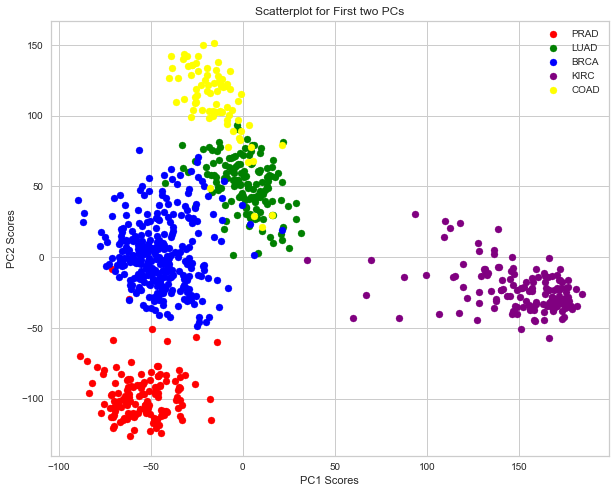

In [38]:
# PC1 and PC2 Scores Class-wise
color_list = ['red', 'green', 'blue', 'purple', 'yellow']
labels_ = ['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD']
dict_ = dict(zip(labels_, color_list))

figure(figsize=(10, 8))
for label_ in labels_:
    scatter(df_clust[df_clust.Class == label_].iloc[:, 0], df_clust[df_clust.Class == label_].iloc[:, 1], color=dict_[label_], label=label_)
    xlabel('PC1 Scores')
    ylabel('PC2 Scores')
    title('Scatterplot for First two PCs')
    legend()

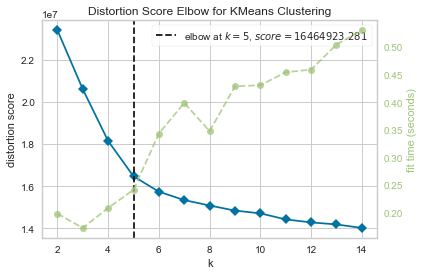

In [18]:
# K-Means
model = KMeans()
vis_ = KElbowVisualizer(model, k=(2,15))

vis_.fit(df_pcs)        
vis_.show()  

In [11]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(df_pcs)
clusters = kmeans.labels_
cluster_map_kmeans = {0: 'COAD', 1: 'LUAD', 2: 'PRAD', 3: 'BRCA', 4: 'KIRC'}
df_clust['Class_predicted_kmeans'] = list([cluster_map_kmeans[_] for _ in clusters])
rand_index = round(adjusted_rand_score(df_clust.Class, df_clust.Class_predicted_kmeans), 4)
print('Rand Index for K-Means : {}'.format(rand_index))


Rand Index for K-Means : 0.9814


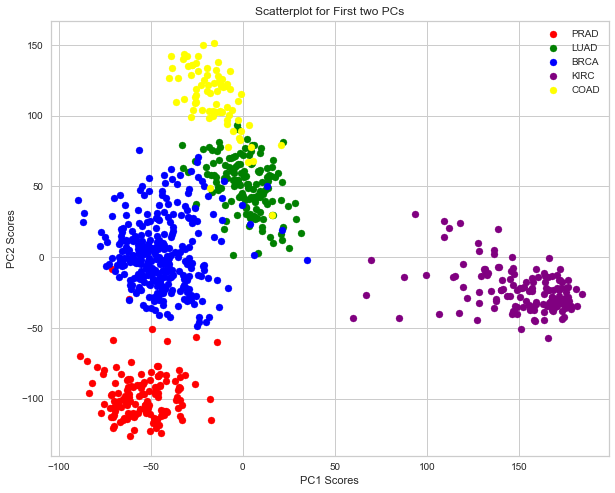

In [13]:
# PC1 and PC2 Scores K-Means Cluster wise
color_list = ['red', 'green', 'blue', 'purple', 'yellow']
labels_ = ['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD']
dict_ = dict(zip(labels_, color_list))

figure(figsize=(10, 8))
for label_ in labels_:
    scatter(df_clust[df_clust.Class_predicted_kmeans == label_].iloc[:, 0], df_clust[df_clust.Class_predicted_kmeans == label_].iloc[:, 1], color=dict_[label_], label=label_)
    xlabel('PC1 Scores')
    ylabel('PC2 Scores')
    title('Scatterplot for First two PCs')
    legend()

In [9]:
# Hierarchical Clustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df_pcs)
cluster_map_hclust = {0: 'BRCA', 1: 'KIRC', 2: 'PRAD', 3: 'LUAD', 4: 'COAD'}
clusters = cluster.labels_
df_clust['Class_predicted_hclust'] = list([cluster_map_hclust[_] for _ in clusters])
rand_index = round(adjusted_rand_score(df_clust.Class, df_clust.Class_predicted_hclust), 4)
print('Rand Index for HClust : {}'.format(rand_index))


Rand Index for HClust : 0.9833


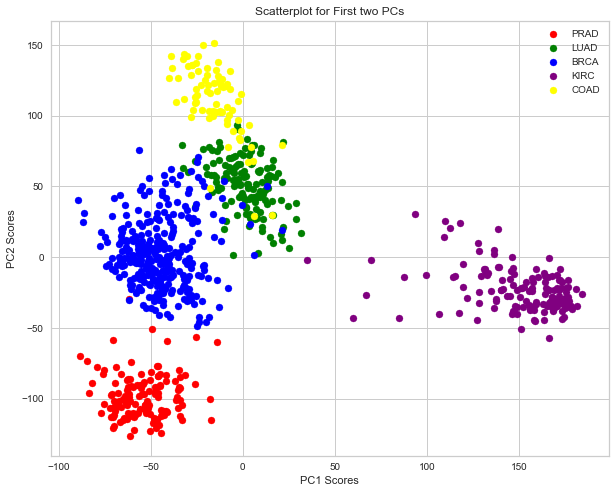

In [20]:
# PC1 and PC2 Scores Hierarchical Cluster wise
color_list = ['red', 'green', 'blue', 'purple', 'yellow']
labels_ = ['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD']
dict_ = dict(zip(labels_, color_list))

figure(figsize=(10, 8))
for label_ in labels_:
    scatter(df_clust[df_clust.Class_predicted_hclust == label_].iloc[:, 0], df_clust[df_clust.Class_predicted_hclust == label_].iloc[:, 1], color=dict_[label_], label=label_)
    xlabel('PC1 Scores')
    ylabel('PC2 Scores')
    title('Scatterplot for First two PCs')
    legend()